# EDA 
### (Continued)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import folium

import datetime

In [2]:
data = pd.read_csv("final_data.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113105 entries, 0 to 113104
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113105 non-null  object 
 1   payment_sequential             113105 non-null  int64  
 2   payment_type                   113105 non-null  object 
 3   payment_installments           113105 non-null  int64  
 4   payment_value                  113105 non-null  float64
 5   customer_id                    113105 non-null  object 
 6   order_status                   113105 non-null  object 
 7   order_purchase_timestamp       113105 non-null  object 
 8   order_approved_at              113105 non-null  object 
 9   order_delivered_carrier_date   113105 non-null  object 
 10  order_delivered_customer_date  113105 non-null  object 
 11  order_estimated_delivery_date  113105 non-null  object 
 12  review_score                  

In [4]:
#lets change the datetime features to correct format
data["order_purchase_timestamp"] = pd.to_datetime(data["order_purchase_timestamp"])
data["order_approved_at"] = pd.to_datetime(data["order_approved_at"])
data["order_delivered_carrier_date"] = pd.to_datetime(data["order_delivered_carrier_date"])
data["order_delivered_customer_date"] = pd.to_datetime(data["order_delivered_customer_date"])
data["order_estimated_delivery_date"] = pd.to_datetime(data["order_estimated_delivery_date"])
data["shipping_limit_date"] = pd.to_datetime(data["shipping_limit_date"])


In [5]:
rate_1 = data[data["review_score"]==1] 
rate_2 = data[data["review_score"]==2] 
rate_3 = data[data["review_score"]==3] 
rate_4 = data[data["review_score"]==4] 
rate_5 = data[data["review_score"]==5] 

## Bivariate analysis

<b> We can compare pair of features at a time to distinguish between review_scores. But considering each pair is very costly since we have more number of features.

### Pair plots

In [37]:
df = data[["price","freight_value","payment_value","review_score"]]

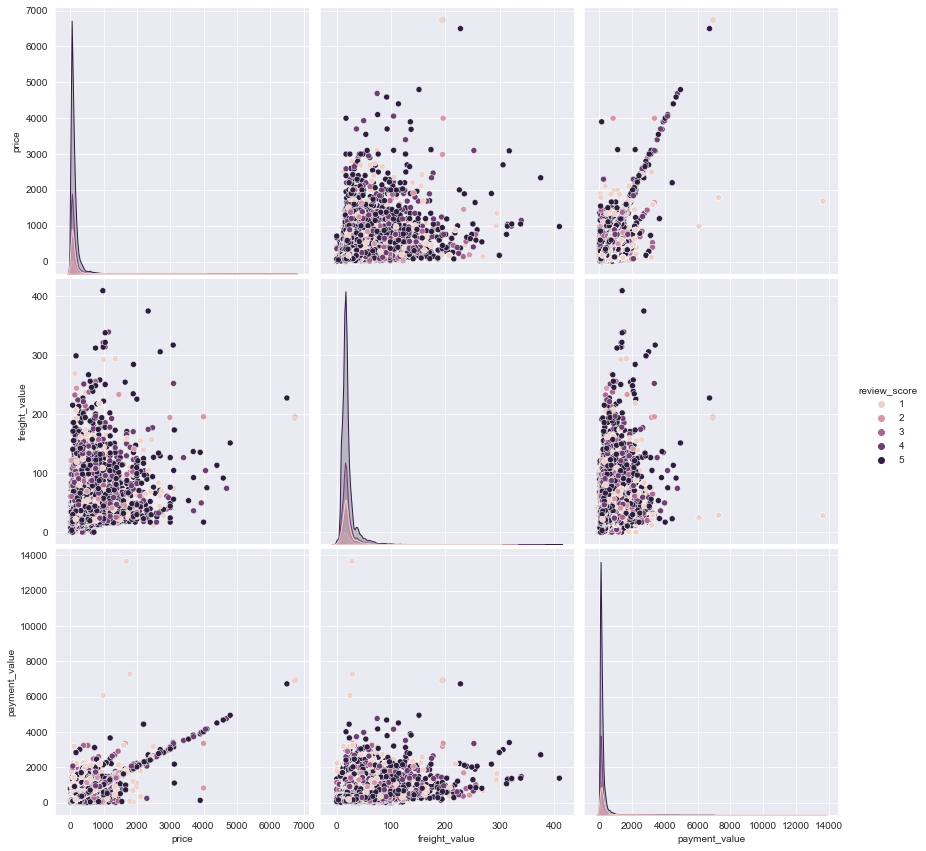

In [38]:
#plotting pair plot

plt.close()
sns.set_style("darkgrid")
sns.pairplot(df,hue="review_score",height=4)

plt.show()

In [39]:
df.corr()

,price,freight_value,payment_value,review_score
price,1.000000,0.415139,0.736278,0.002252
freight_value,0.415139,1.000000,0.372523,-0.034503
payment_value,0.736278,0.372523,1.000000,-0.083140
review_score,0.002252,-0.034503,-0.083140,1.000000


<b>From the above plot,
    - The plots are highly overlapped. 
    - payment_value and price are strongly correlated with correlation = 0.74
    - So we can see somewhat linear relation in payment_value v/s price plot 
    

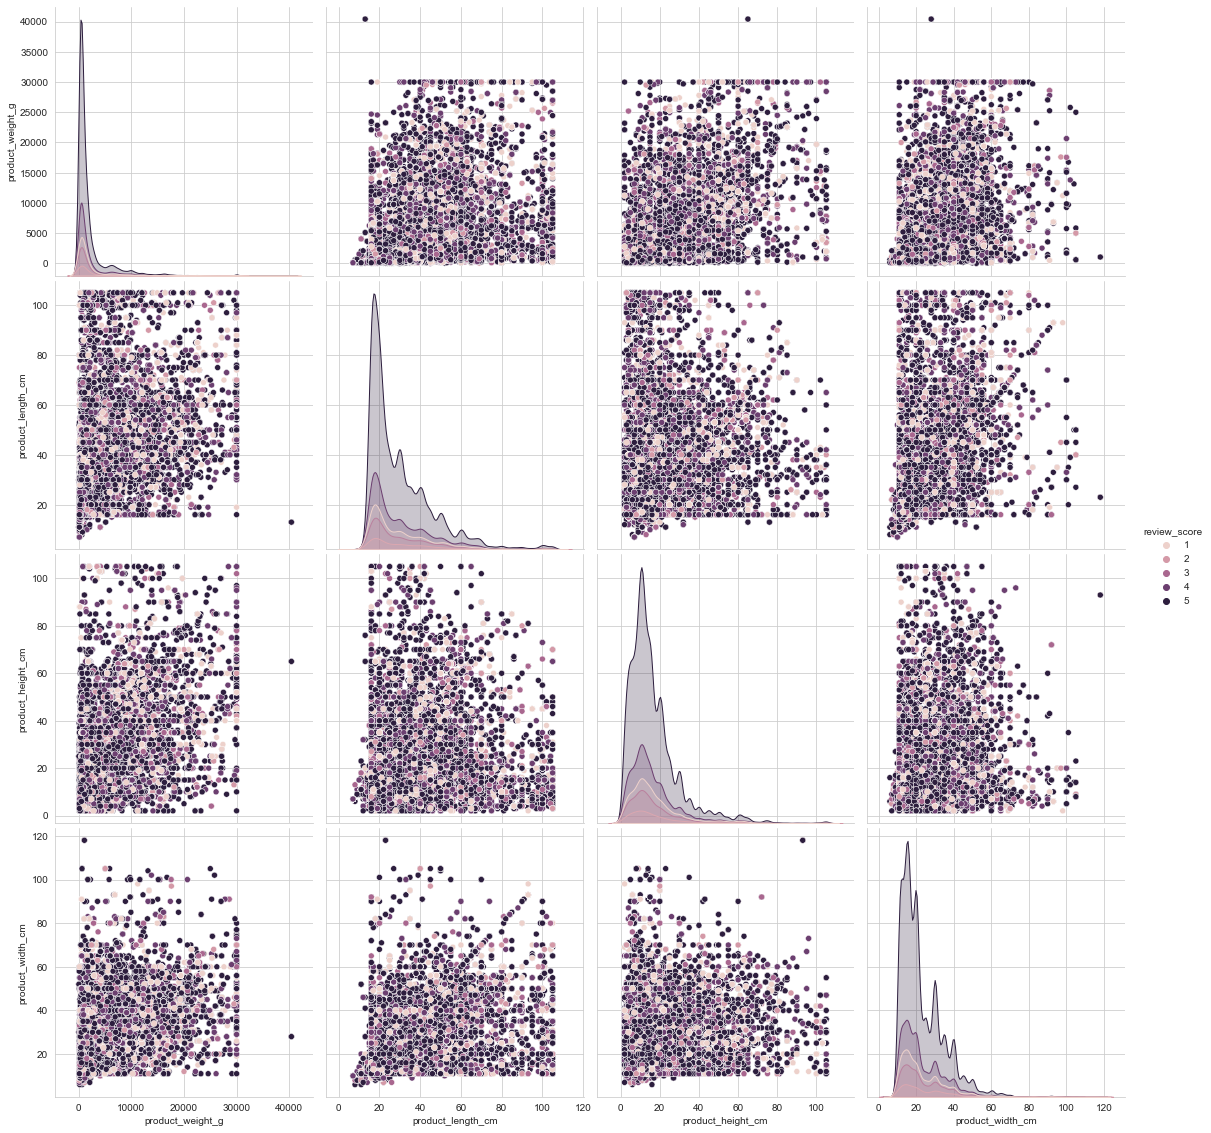

In [41]:
df_2 = data[["product_weight_g","product_length_cm","product_height_cm","product_width_cm","review_score"]]

#plotting pair plot

plt.close()
sns.set_style("whitegrid")
sns.pairplot(df_2,hue="review_score",height=4)

plt.show()

In [42]:
df_2.corr()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
product_weight_g,1.000000,0.458469,0.585460,0.505625,-0.027676
product_length_cm,0.458469,1.000000,0.190041,0.533137,-0.020965
product_height_cm,0.585460,0.190041,1.000000,0.278675,-0.023773
product_width_cm,0.505625,0.533137,0.278675,1.000000,-0.012380
review_score,-0.027676,-0.020965,-0.023773,-0.012380,1.000000


<b> From the above parplot,
    - We cannot distinguish among review_scores clearly. In all the plots, data points are overlapped on one another.
    - We can see that product_height_cm and product_weight_g correlated with correlation = 0.585460.

<b> <font color="red"> 
- It is not possible to classify review_scores clearly/easily by simple rule based method.
- There is no clear separation when we check with pair of features. 
- So, simple classification is not possible. 
- option 1: By the combination of more features, it could be possible to classify the points, since in the higher dimenions, there are mosre possibility of clear separation of datapoints. 
- option 2: We should create more features using the existing features. 

## Purchase Timestamp analysis:

<b>order_purchase_timestamp

In [24]:
data.order_purchase_timestamp[0]

Timestamp('2018-04-25 22:01:49')

In [29]:
data.order_purchase_timestamp[0].second

49

In [42]:
df = pd.DataFrame()
df["review_score"] = data["review_score"]

In [44]:
df["purchased_hour"] = data["order_purchase_timestamp"].apply(lambda x: x.hour)
df["purchased_month"] = data["order_purchase_timestamp"].apply(lambda x: x.month)
df["purchased_year"] = data["order_purchase_timestamp"].apply(lambda x: x.year)
df["purchased_day"] = data["order_purchase_timestamp"].apply(lambda x: x.day)


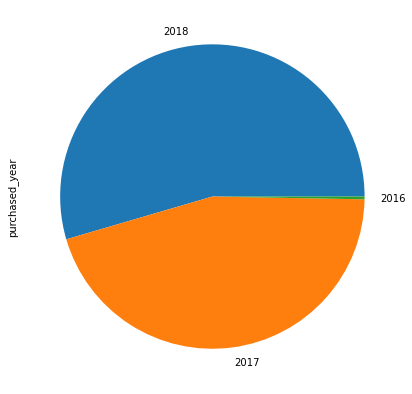

Purchase counts by year : 
 2018    61680
2017    51095
2016      330
Name: purchased_year, dtype: int64


In [180]:
df["purchased_year"].value_counts(normalize=True).plot(kind="pie",figsize=(7,7))
plt.show()

print("Purchase counts by year : \n",df["purchased_year"].value_counts())

* There are very less number of orders in 2016. In 2017 and 2018 orders are high.

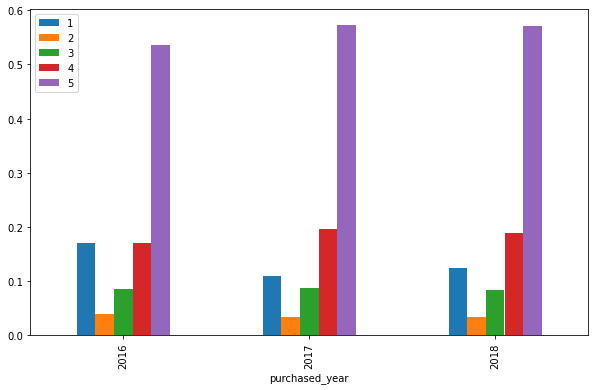

In [175]:
df.groupby("purchased_year")["review_score"].value_counts(normalize=True).unstack().plot(
                                                                 kind="bar",figsize=(10,6)).legend(loc="upper left")
plt.show()

* There are very less number of orders in 2016. In 2017 and 2018 orders are high. 
* In 2016 percentage share of review_score 1 is high comapred to other year's percentage share of review_score 1.
* In all years, review_score 5, has more than 50% review score share. 
* In 2017, percentage share of score 1, is less compared to that of in 2018.

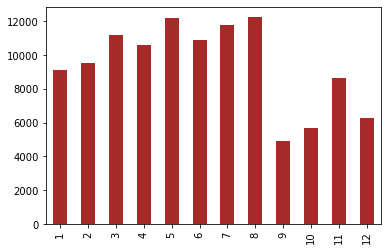

In [166]:
df["purchased_month"].value_counts().sort_index(axis=0).plot(kind="bar",color="brown")
plt.show()

* Totally August and May month has high number of orders. Purchase in July is also comparable to May.
* Least purchase was in September overall.

In [167]:
df.groupby("purchased_month")["review_score"].value_counts(normalize=True).unstack()*100

review_score,1,2,3,4,5
purchased_month,,,,,
1,12.656559,3.900242,9.173808,18.666227,55.603164
2,16.463926,4.142198,9.742030,18.456376,51.195470
3,16.745515,3.766848,9.551013,19.218067,50.718558
4,10.593220,3.832392,8.163842,20.094162,57.316384
5,9.736475,2.651671,8.472211,19.694606,59.445037
6,9.247173,3.253976,7.693722,18.770108,61.035022
7,8.752122,3.005093,7.767402,18.582343,61.893039
8,8.068200,3.108174,7.056616,19.530103,62.236907
9,9.786368,3.031536,7.487284,19.674466,60.020346


* Percentage share of review_score 1 is high in month March,February comapred to the same of other months.
* In all months review_score 5 has highest score share and score 4 is in second place. 

In [110]:
print("The highest number of purchases happened in hour (top 2) : \n",df["purchased_hour"].value_counts()[:2])
print("*"*70)
print("The lowest number of purchases happened in hour (last 2) : \n",df["purchased_hour"].value_counts()[:-3:-1])

The highest number of purchases happened in hour (top 2) : 
 16    7659
14    7632
Name: purchased_hour, dtype: int64
**********************************************************************
The lowest number of purchases happened in hour (last 2) : 
 5    209
4    248
Name: purchased_hour, dtype: int64


In [91]:
df.groupby("purchased_hour")["review_score"].value_counts(normalize=True).unstack().loc[[4,5,14,16]]*100

review_score,1,2,3,4,5
purchased_hour,,,,,
4,17.741935,2.419355,6.854839,18.145161,54.838710
5,13.875598,2.870813,7.177033,12.440191,63.636364
14,11.766247,3.524633,8.123690,18.684486,57.900943
16,11.790051,3.120512,8.382295,19.297558,57.409583


* At 14,16 hours there are  more purchases. At this time roughly 57% of purchases get 5 star score. There are less number of purchases got 1 star score.
* At 4,5 hours there are less number of purchases. % share Review_score 1 is more compared to hours 14 and 16.
* At 4,5 hours, % share of review_score 1 is comparable with that of score 4.

<b> Analysis of pruchases in year 2016

In [95]:
df[df["purchased_year"]==2016]["purchased_month"].value_counts()

10    329
12      1
Name: purchased_month, dtype: int64

* Olist had started in 2016
* There are significantly less purchases in 2016. Out of 330 purchases of 2016, 329 purchases happened in October. 1 purchase happened in December.


In [163]:
df[df["purchased_year"]==2016].groupby("purchased_day")["review_score"].value_counts().unstack()

review_score,1,2,3,4,5
purchased_day,,,,,
3,2.0,NaN,1.0,2.0,2.0
4,11.0,1.0,6.0,8.0,43.0
5,10.0,5.0,1.0,6.0,29.0
6,6.0,3.0,3.0,12.0,23.0
7,12.0,1.0,3.0,6.0,23.0
8,3.0,NaN,7.0,7.0,25.0
9,8.0,NaN,1.0,7.0,12.0
10,4.0,3.0,6.0,8.0,19.0
23,NaN,NaN,NaN,NaN,1.0


* In 2016, out of all purchases made in day 7, 12 purchases got review_score 1, whereas 6 purchases got review_score 4.
* We can interpret the above table like this. Since there are very low number of purchases, we cannot get more information.

<b> Analysing purchases in 2017

In [109]:
print("The top 2 months which has more number of purchases in 2017 is : \n",
                                  df[df["purchased_year"]==2017]["purchased_month"].value_counts()[:2])
print("*"*70)

print("The 2 months which has less number of purchases in 2017 is :\n ",
                                  df[df["purchased_year"]==2017]["purchased_month"].value_counts()[:-3:-1])


The top 2 months which has more number of purchases in 2017 is : 
 11    8667
12    6274
Name: purchased_month, dtype: int64
**********************************************************************
The 2 months which has less number of purchases in 2017 is :
  1     956
2    1894
Name: purchased_month, dtype: int64


* November has highest number of purchases in 2017. December is the 2nd highest.
* Janauary has less number of purchases followed by February.
* This is because in 2016 there are very less number of purchases. The Olist platform started in 2016. So there was very less purchases in 2016. This has affected the early months of 2017 also. Gradually the sales had increased. At the end of 2017, sales were very high.

In [114]:
df[df["purchased_year"]==2017].groupby("purchased_month")["review_score"].value_counts(normalize=True).unstack()*100

review_score,1,2,3,4,5
purchased_month,,,,,
1,9.623431,3.242678,8.054393,17.677824,61.401674
2,8.078141,3.643083,10.084477,19.640971,58.553326
3,9.561753,3.087649,9.794157,21.148738,56.407703
4,10.229008,4.160305,8.854962,20.343511,56.412214
5,9.099640,2.569028,8.691477,20.360144,59.279712
6,9.012994,3.013547,8.902405,19.823058,59.247996
7,9.137820,3.590626,8.750806,19.329177,59.191572
8,7.614827,3.323932,6.990330,19.580983,62.489927
9,9.786368,3.031536,7.487284,19.674466,60.020346


* % share of review_score 5 is high August month. 
* Also August month has less % share of review_score 1
* November month has highest number of purchases. Also % share of review_score 1 is high in november compared to the same of other months.
* % share of review_score 4 is almost same in all months of 2017. Similarly this holds for review_score 2 and 3.
* % share of Review_score 5 has decreased at the end of 2017

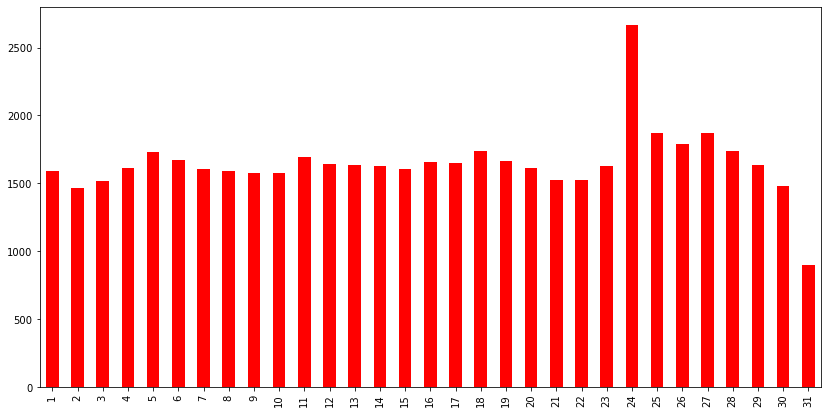

In [158]:
df[df["purchased_year"]==2017]["purchased_day"].value_counts().sort_index(axis=0).plot(kind="bar",color="red",figsize=(14,7))

* In 2017, there is significantly high number of purchases made on day 24.
* There as very less number of purchases made on day 31. 
* On all other days purchases are not very different.

In [121]:
df[df["purchased_year"]==2017].groupby("purchased_day")["review_score"].value_counts(normalize=True).unstack().loc[[24,31]]

review_score,1,2,3,4,5
purchased_day,,,,,
24,0.137879,0.038966,0.105658,0.186587,0.53091
31,0.092634,0.029018,0.082589,0.202009,0.59375


* % share of review_sscore 1 is comparatively less in day 31 than day 24.

<b> Analysing purchases in 2018

In [124]:
df[df["purchased_year"]==2018]["purchased_month"].value_counts()

3    8191
1    8146
5    8016
4    8000
2    7642
8    7294
6    7262
7    7129
Name: purchased_month, dtype: int64

* First thing is, data has only purchase information from October 2016 to August 2018

* In 2018, March > Janauary > June > April has more number of purchases.
* July has least number of purchases.

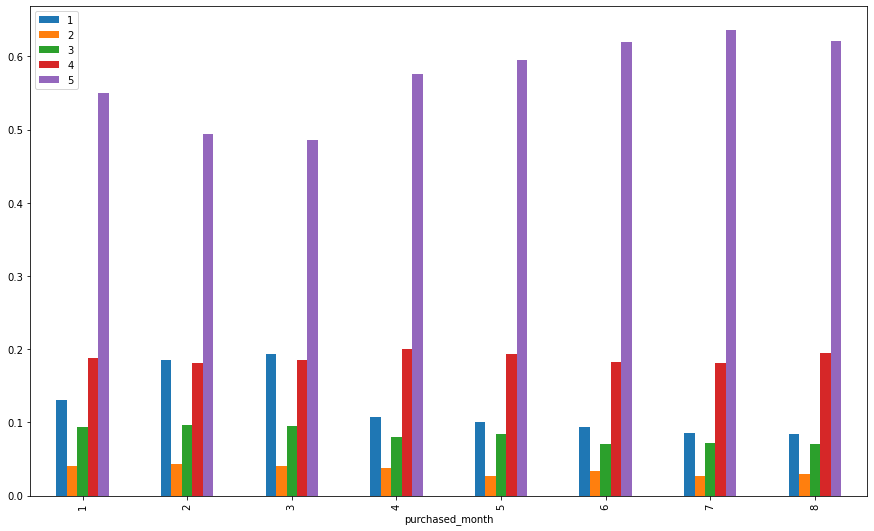

In [148]:
df[df["purchased_year"]==2018].groupby("purchased_month")["review_score"].value_counts(normalize=True).unstack().plot(
                                                                        kind="bar",figsize=(15,9)).legend(loc="upper left")
plt.show()

* March month has highest number of purchases, as well as % share of review_score 1 is much higher in March.
* % share of review_score 5 is more in July, though it has less number of purchases compared to other months.
* % share of review_score 2,3,4 are not much varying accross months.

In [131]:
print("The top 2 days which has more number of purchases in 2018 is : \n",
                                  df[df["purchased_year"]==2018]["purchased_day"].value_counts()[:2])
print("*"*70)

print("The 2 days which has less number of purchases in 2018 is :\n ",
                                  df[df["purchased_year"]==2018]["purchased_day"].value_counts()[:-3:-1])


The top 2 days which has more number of purchases in 2018 is : 
 16    2461
15    2350
Name: purchased_day, dtype: int64
**********************************************************************
The 2 days which has less number of purchases in 2018 is :
  31     995
29    1310
Name: purchased_day, dtype: int64


In [132]:
df.groupby("purchased_day")["review_score"].value_counts(normalize=True).unstack().loc[[15,16,29,31]]*100

review_score,1,2,3,4,5
purchased_day,,,,,
15,11.434354,3.263344,9.284088,19.655958,56.362257
16,11.583293,4.103934,8.110733,18.698397,57.503643
29,12.066621,3.399048,9.551326,18.966689,56.016315
31,10.259122,3.067160,7.297726,19.460603,59.915389


* % share of review_scores are not much varying in top 2 days and least 2 days of 2018
* End of month i.e. day 31,29 has less number of purchases.
* Mid-month days has most purchases.

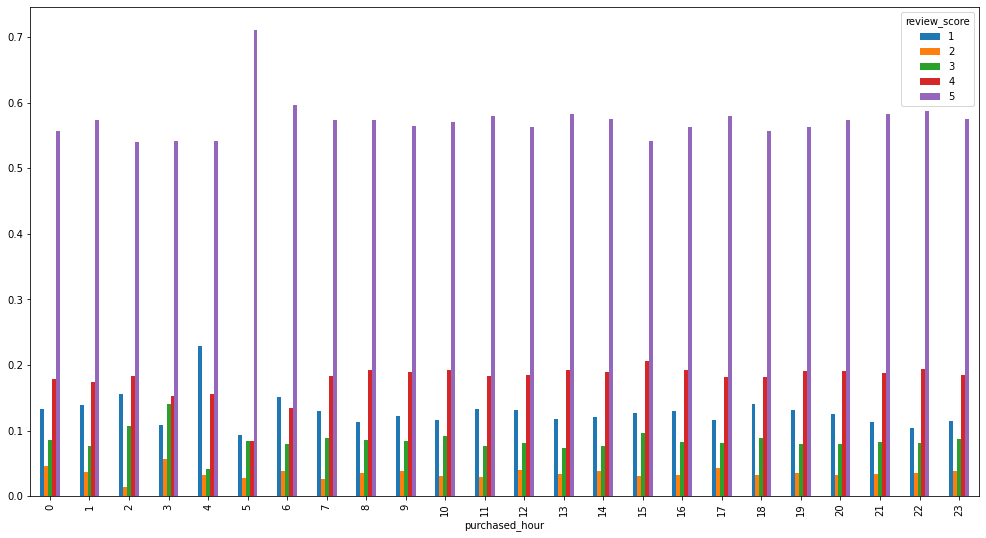

In [140]:
df[df["purchased_year"]==2018].groupby("purchased_hour")["review_score"].value_counts(normalize=True).unstack().plot(
                                                                                                   kind='bar',figsize=(17,9))
plt.show()

* % share of review_score 5 is high for the purchase made at hour 5.
* The pruchases made at 4, are more likely to get review_rating 1 than 4. Ofcourse more likely rating is 5, if we consider the second place, it is review_score 1.
* Also % share of review_score 1 is more at hour 4 compared to the same of other hours.

<b> By yearly analysis,
    - There is less number of purchases in 2016, since Olist was started in end of 2016.
    - This fact affected the number of purchases in early months of 2017 also. At the last stages of 2017, purchases were high.
    - Purchase information that we have is from Oct 2016 to August 2018.
    - In all the months % share of review_score 5 is significantly high.
    - Generally, 5 star >> 4 star >= 1 star > 2 star >= 3 star in % review_score sharing.
    - In 2016 percentage share of review_score 1 is high comapred to other year's percentage share of review_score 1.
    - In all years, review_score 5, has more than 50% review score share.
    - In 2017, percentage share of score 1, is less compared to that of in 2018.